In [3]:
# Leitura do arquivo vindo do squad 2

import pandas as pd
import requests

def leitura():
    csv = requests.get("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv").content
    f = open('data.csv', 'wb')
    f.write(csv)
    f.close()
    df = pd.read_csv('data.csv')
    return df

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Leitura executada com sucesso!
sepal.length
petal.length


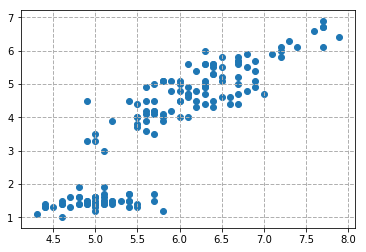

127.0.0.1 - - [24/Jan/2020 21:54:22] "POST /scatter HTTP/1.1" 200 -
127.0.0.1 - - [24/Jan/2020 21:54:49] "POST /scatter HTTP/1.1" 400 -


Leitura executada com sucesso!


127.0.0.1 - - [24/Jan/2020 21:56:36] "POST /scatter HTTP/1.1" 400 -


Leitura executada com sucesso!


In [3]:
#Criar endpoint de post que retorna o gráfico de dispersão e tem como input um json com as coordenadas a serem 
#plotadas. Por exemplo: {“coords”: [“sepal.length”, “petal.length”]

from flask import Flask, request, current_app, jsonify
import matplotlib.pyplot as plt


app = Flask(__name__)

@app.route("/scatter", methods=['POST'])

def scatter():
    df = pd.read_csv("data.csv", sep=";")
    parametros = request.json 
    lista = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
    
    if parametros["1"] in lista and parametros["2"] in lista:
     
      
        plt.scatter(df[parametros["1"]] , df[parametros["2"]] )
        plt.grid( linewidth= 1, linestyle="--")
        plt.show()
        return "grafico"  ,200
    
    else:
        return "cago", 400
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Leitura executada com sucesso!


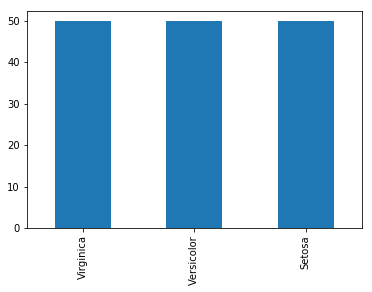

127.0.0.1 - - [24/Jan/2020 21:10:26] "POST /hist HTTP/1.1" 200 -


In [4]:
#- Criar endpoint de get que retorna o histograma

from flask import Flask, request, current_app, jsonify
import matplotlib.pyplot as plt



app = Flask(__name__)

@app.route("/hist", methods=['POST'])

def hist():
    df = leitura()
    print("Leitura executada com sucesso!")
    
    df.variety.value_counts().plot(kind='bar')
    
    plt.show()
    
    return "grafico"  ,200

app.run()